INTEGRANTES: Nicolas Lagos, Carlos Duran, Maximiliano Esparza, Constanza Vargas


# Taller 1


In [2]:
import pandas as pd
df = pd.read_csv("ventas_demo.csv", sep=";")

# BLoque 1 Limpieza de datos con pandas


1. Carga del dataset y muestra las primeras filas


In [3]:
df.head(20)


,Id,Precio,Descuento,Cantidad,Ciudad,Categoria
0,1,16686.0,0.088728,3,Talca,Pastelería
1,2,19594.0,0.036149,5,Santiago,Bebestibles
2,3,8149.0,0.103496,2,Concepción,Bebestibles
3,4,8273.0,0.046188,8,Concepción,Pastelería
4,5,17677.0,0.062412,10,Santiago,Bebestibles
5,6,15340.0,0.119852,7,Concepción,Café
6,7,18282.0,0.127779,2,Santiago,Pastelería
7,8,13864.0,0.068892,2,Santiago,Café
8,9,16659.0,0.149370,5,Concepción,Snacks
9,10,15939.0,0.157875,6,Concepción,Snacks


2. Calcula la cantidad de valores nulos por columna


In [4]:
df.isna().sum().sort_values(ascending=False)

Descuento    15
Categoria     9
Precio        0
Id            0
Cantidad      0
Ciudad        0
dtype: int64

3. Imputa los valores faltantes de Descuento con la mediana


In [5]:
df['Descuento'].fillna(df['Descuento'].median(), inplace=True)

C:\Users\nicol\AppData\Local\Temp\ipykernel_31048\188832815.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Descuento'].fillna(df['Descuento'].median(), inplace=True)


In [6]:
df.isna().sum().sort_values(ascending=False)

Categoria    9
Id           0
Precio       0
Descuento    0
Cantidad     0
Ciudad       0
dtype: int64

In [7]:
df.head(20)

,Id,Precio,Descuento,Cantidad,Ciudad,Categoria
0,1,16686.0,0.088728,3,Talca,Pastelería
1,2,19594.0,0.036149,5,Santiago,Bebestibles
2,3,8149.0,0.103496,2,Concepción,Bebestibles
3,4,8273.0,0.046188,8,Concepción,Pastelería
4,5,17677.0,0.062412,10,Santiago,Bebestibles
5,6,15340.0,0.119852,7,Concepción,Café
6,7,18282.0,0.127779,2,Santiago,Pastelería
7,8,13864.0,0.068892,2,Santiago,Café
8,9,16659.0,0.149370,5,Concepción,Snacks
9,10,15939.0,0.157875,6,Concepción,Snacks


4. Reemplaza los nulos de Categoría con el valor más frecuente


In [8]:
df['Categoria'].fillna(df['Categoria'].mode()[0], inplace=True)

C:\Users\nicol\AppData\Local\Temp\ipykernel_31048\2481078812.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Categoria'].fillna(df['Categoria'].mode()[0], inplace=True)


In [9]:
df.isna().sum().sort_values(ascending=False)

Id           0
Precio       0
Descuento    0
Cantidad     0
Ciudad       0
Categoria    0
dtype: int64

5. Elimina los duplicados


In [10]:
df.duplicated().sum()


np.int64(4)

In [11]:
df=df.drop_duplicates()

In [12]:
df.duplicated().sum()


np.int64(0)

6. Detecta los outliers de Precio usando el método IQR


In [13]:
Q1 = df['Precio'].quantile(0.25)
Q3 = df['Precio'].quantile(0.75)
IQR = Q3 - Q1
Outliers = df[(df['Precio'] < Q1 - 1.5 * IQR) | (df['Precio'] > Q3 + 1.5 * IQR)]

7. Indica cuántos outliers fueron detectados (solo número, no análisis)


In [14]:
Outliers.shape[0] #Outliers de Precio

3

# Bloque 2 Preprocesamiento y Probabilidad


In [15]:
import pandas as pd
df2 = pd.read_csv("productos_demo.csv", sep=";")

In [16]:
df2.isna().sum().sort_values(ascending=False)

Categoria    7
Proveedor    5
Stock        0
Precio       0
dtype: int64

In [17]:
df2['Categoria'].fillna(df2['Categoria'].mode()[0], inplace=True)
df2['Proveedor'].fillna(df2['Proveedor'].mode()[0], inplace=True)

C:\Users\nicol\AppData\Local\Temp\ipykernel_31048\1432465839.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['Categoria'].fillna(df2['Categoria'].mode()[0], inplace=True)
C:\Users\nicol\AppData\Local\Temp\ipykernel_31048\1432465839.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as

In [18]:
df2.isna().sum().sort_values(ascending=False)

Precio       0
Stock        0
Categoria    0
Proveedor    0
dtype: int64

1.  Normaliza las columnas númericas (Precio, Stock) con MinMaxScaler


In [19]:
from sklearn.preprocessing import MinMaxScaler

scalerMM = MinMaxScaler()
df2[['Precio', 'Stock']] = scalerMM.fit_transform(df2[['Precio', 'Stock']])

In [20]:
df2[['Precio', 'Stock']]

,Precio,Stock
0,0.169240,0.192
1,0.314034,0.520
2,0.294622,0.344
3,0.585080,0.912
4,0.592342,0.096
...,...,...
138,0.168079,0.216
139,0.332672,0.520
140,0.121799,0.456
141,0.359781,0.216


In [26]:
df2

,Precio,Stock,Categoria_Línea A,Categoria_Línea B,Categoria_Línea C,Proveedor_ProvCentro,Proveedor_ProvNorte,Proveedor_ProvSur
0,0.169240,0.192,0.0,1.0,0.0,0.0,0.0,1.0
1,0.314034,0.520,0.0,1.0,0.0,1.0,0.0,0.0
2,0.294622,0.344,0.0,1.0,0.0,0.0,0.0,1.0
3,0.585080,0.912,1.0,0.0,0.0,0.0,0.0,1.0
4,0.592342,0.096,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
138,0.168079,0.216,1.0,0.0,0.0,0.0,0.0,1.0
139,0.332672,0.520,0.0,1.0,0.0,1.0,0.0,0.0
140,0.121799,0.456,1.0,0.0,0.0,0.0,1.0,0.0
141,0.359781,0.216,1.0,0.0,0.0,0.0,0.0,1.0


4.Calcula la probabilidad conjunta de de que Stock > 50 y Precio > 10000


In [27]:
totalStock = len(df2['Stock'])
favorables = ((df2['Stock'] > 50) & (df2['Precio'] > 10000)).sum()
pEmpirica = (favorables/totalStock)
print(f"{pEmpirica:.2f}")

0.00


# Bloque 3 Mini Desafío Integrador


In [28]:
import pandas as pd
df3 = pd.read_csv('clientes_integrador.csv', sep=';')

In [29]:
df3.head(20)

,Id,Edad,IngresoMensual,Deuda,Ciudad,Genero
0,1,21,847804.0,0.0,Concepción,M
1,2,43,589493.0,183505.0,San Pedro,M
2,3,46,845798.0,421486.0,San Pedro,M
3,4,33,581787.0,163355.0,Concepción,F
4,5,41,490102.0,233122.0,Talcahuano,M
5,6,49,890290.0,367393.0,Concepción,F
6,7,21,865276.0,493895.0,San Pedro,M
7,8,27,993785.0,145010.0,Concepción,M
8,9,65,1475759.0,217811.0,Talcahuano,F
9,10,39,903187.0,456867.0,Concepción,M


1.Limpia los datos: elimina duplicados, imputa nulos con media/moda según corresponda.


In [30]:
df3.isna().sum().sort_values(ascending=False)

IngresoMensual    12
Genero            10
Edad               0
Id                 0
Deuda              0
Ciudad             0
dtype: int64

In [31]:
df3['IngresoMensual'].fillna(df3['IngresoMensual'].mean(), inplace=True)

C:\Users\nicol\AppData\Local\Temp\ipykernel_31048\1085764471.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df3['IngresoMensual'].fillna(df3['IngresoMensual'].mean(), inplace=True)


In [32]:
df3.isna().sum().sort_values(ascending=False)

Genero            10
Id                 0
Edad               0
IngresoMensual     0
Deuda              0
Ciudad             0
dtype: int64

In [33]:
df3['Genero'].fillna(df3['Genero'].mode()[0], inplace=True)

C:\Users\nicol\AppData\Local\Temp\ipykernel_31048\3515832937.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df3['Genero'].fillna(df3['Genero'].mode()[0], inplace=True)


In [34]:
df3.isna().sum().sort_values(ascending=False)

Id                0
Edad              0
IngresoMensual    0
Deuda             0
Ciudad            0
Genero            0
dtype: int64

In [35]:
df3_copia = df3.copy()

2.Normaliza las variables numéricas (Edad, IngresoMensual, Deuda) usando StandardScaler.


In [36]:
from sklearn.preprocessing import StandardScaler

scalerMM = StandardScaler()
df3[['Edad','IngresoMensual', 'Deuda']] = scalerMM.fit_transform(df3[['Edad','IngresoMensual', 'Deuda']])

In [37]:
df3[['Edad', 'IngresoMensual', 'Deuda']]

,Edad,IngresoMensual,Deuda
0,-1.531996,0.104969,-0.591283
1,-0.270549,-0.690918,-0.239804
2,-0.098533,0.098789,0.216018
3,-0.843934,-0.714661,-0.278398
4,-0.385226,-0.997154,-0.144769
...,...,...,...
201,-0.614580,-0.230636,-0.591283
202,1.449607,1.407683,-0.591283
203,1.105576,-1.052781,-0.374753
204,-0.270549,-0.690918,-0.239804


3.Codifica las variables categóricas (Ciudad, Genero) con OneHotEncoder.


In [38]:
from sklearn.preprocessing import OneHotEncoder
OHE = OneHotEncoder(sparse_output=False)
encoded2 = OHE.fit_transform(df3[['Ciudad', 'Genero']])
df_encoded2 = pd.DataFrame(encoded2, columns=OHE.get_feature_names_out(['Ciudad', 'Genero']))
df3 = pd.concat([df3, df_encoded2], axis=1)

In [39]:
df3 = df3.drop(columns=['Ciudad', 'Genero'])

In [40]:
df3

,Id,Edad,IngresoMensual,Deuda,Ciudad_Chillán,Ciudad_Concepción,Ciudad_San Pedro,Ciudad_Talcahuano,Genero_F,Genero_M
0,1,-1.531996,0.104969,-0.591283,0.0,1.0,0.0,0.0,0.0,1.0
1,2,-0.270549,-0.690918,-0.239804,0.0,0.0,1.0,0.0,0.0,1.0
2,3,-0.098533,0.098789,0.216018,0.0,0.0,1.0,0.0,0.0,1.0
3,4,-0.843934,-0.714661,-0.278398,0.0,1.0,0.0,0.0,1.0,0.0
4,5,-0.385226,-0.997154,-0.144769,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
201,100,-0.614580,-0.230636,-0.591283,0.0,1.0,0.0,0.0,1.0,0.0
202,129,1.449607,1.407683,-0.591283,0.0,0.0,1.0,0.0,0.0,1.0
203,176,1.105576,-1.052781,-0.374753,0.0,0.0,1.0,0.0,1.0,0.0
204,2,-0.270549,-0.690918,-0.239804,0.0,0.0,1.0,0.0,0.0,1.0


4.a. La probabilidad de que un cliente tenga IngresoMensual > 800000.


In [41]:
import pandas as pd
df3_copia = pd.read_csv('clientes_integrador.csv', sep=';')
totalStock = len(df3_copia['IngresoMensual'])
favorables = (df3_copia['IngresoMensual'] > 800000).sum()
pEmpirica = (favorables/totalStock)
print(f"{pEmpirica:.2f}")

0.51


4.b. La probabilidad conjunta de que IngresoMensual > 800000 y Deuda < 200000.


In [42]:
favorables = ((df3_copia['IngresoMensual'] > 800000 ) & (df3_copia['Deuda'] < 200000)).sum()
totalStock = len(df3_copia['IngresoMensual'])
pEmpirica = favorables / totalStock
print(f"{pEmpirica:.2f}")

0.17


5.Exporta el dataset final limpio y transformado a clientes_integrador_limpio.csv.


In [43]:
df3.to_csv('clientes_integrador_limpio.csv', sep=';', index=False, encoding='utf-8')

# TALLER 2


In [44]:
import pandas as pd
df_l = pd.read_csv('clientes_integrador_limpio.csv', sep=';', encoding="UTF-8")

PORCENTAJE DE NULOS


In [45]:
df_l.isnull().mean()*100

Id                   0.0
Edad                 0.0
IngresoMensual       0.0
Deuda                0.0
Ciudad_Chillán       0.0
Ciudad_Concepción    0.0
Ciudad_San Pedro     0.0
Ciudad_Talcahuano    0.0
Genero_F             0.0
Genero_M             0.0
dtype: float64

CALCULO DE OUTLIERS


In [46]:
Q1 = df_l['Deuda'].quantile(0.25)
Q3 = df_l['Deuda'].quantile(0.75)
IQR = Q3 - Q1

outliers = df_l[(df_l['Deuda'] < Q1-1.5*IQR) | (df_l['Deuda'] > Q3+1.5*IQR)]

df_sinOutliers = df_l[(df_l['Deuda'] >= Q1-1.5*IQR) & (df_l['Deuda'] <= Q3+1.5*IQR)]

In [47]:
df_sinOutliers.describe()

,Id,Edad,IngresoMensual,Deuda,Ciudad_Chillán,Ciudad_Concepción,Ciudad_San Pedro,Ciudad_Talcahuano,Genero_F,Genero_M
count,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000
mean,99.792079,0.004222,0.009636,-0.136564,0.079208,0.450495,0.232673,0.237624,0.544554,0.455446
std,57.609824,0.990686,0.996218,0.244216,0.270734,0.498779,0.423585,0.426685,0.499248,0.499248
min,1.000000,-1.704012,-2.812662,-0.591283,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,51.250000,-0.786595,-0.658443,-0.304426,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,100.500000,-0.069864,0.000000,-0.141162,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,148.750000,0.818883,0.641839,0.034931,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,200.000000,1.793638,2.577345,0.478395,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


BINARIZACIÓN SEGUN PERCENTIL 75


In [48]:
import numpy as np

p75 = np.percentile(df_sinOutliers['Deuda'], 75)
y_bin = (df_sinOutliers['Deuda'] > p75).astype(int)

In [49]:
y_bin

0      0
1      0
2      1
3      0
4      0
      ..
201    0
202    0
203    0
204    0
205    0
Name: Deuda, Length: 202, dtype: int64

CONTEO DE VARIABLES 0 Y 1


In [50]:
y_bin.value_counts()

Deuda
0    151
1     51
Name: count, dtype: int64

PORCENTAJE DE DEUDA ALTA


In [51]:
pct_ones = y_bin.mean()*100
pct_ones


np.float64(25.247524752475247)

SELECCION DE VARIABLES SIN "DEUDA" NI "ID"


In [52]:
x = df_sinOutliers.drop(columns=["Deuda", 'Id']).copy()
x

,Edad,IngresoMensual,Ciudad_Chillán,Ciudad_Concepción,Ciudad_San Pedro,Ciudad_Talcahuano,Genero_F,Genero_M
0,-1.531996,0.104969,0.0,1.0,0.0,0.0,0.0,1.0
1,-0.270549,-0.690918,0.0,0.0,1.0,0.0,0.0,1.0
2,-0.098533,0.098789,0.0,0.0,1.0,0.0,0.0,1.0
3,-0.843934,-0.714661,0.0,1.0,0.0,0.0,1.0,0.0
4,-0.385226,-0.997154,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...
201,-0.614580,-0.230636,0.0,1.0,0.0,0.0,1.0,0.0
202,1.449607,1.407683,0.0,0.0,1.0,0.0,0.0,1.0
203,1.105576,-1.052781,0.0,0.0,1.0,0.0,1.0,0.0
204,-0.270549,-0.690918,0.0,0.0,1.0,0.0,0.0,1.0


ENTRENAMIENTO


In [53]:
from sklearn.model_selection import train_test_split
Xtr, Xte, ytr, yte = train_test_split(
    x, y_bin, test_size=0.20,
    random_state=42, stratify=y_bin #Porcentaje balanceado
)

In [54]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

PROPORCION DE CLASE MINORITARIA


In [55]:
minor_prop = ytr.value_counts(normalize=True).min() #Normalize ->

In [56]:
minor_prop

np.float64(0.2546583850931677)

TECNICA DE BALANCEO


In [57]:
if minor_prop < 0.35:
    sampler = RandomOverSampler(random_state=42)
    tecnica = "ROS"
elif 0.45 <= minor_prop <= 0.55:
    sampler = None
    tecnica = "none"
else:
    sampler = RandomUnderSampler(random_state=42)
    tecnica = "RUS"

print("Tecnica de balanceo: ", tecnica)

Tecnica de balanceo:  ROS


In [58]:
if sampler is not None:
    xtr_bal, ytr_bal = sampler.fit_resample(Xtr, ytr)
else:
    xtr_bal, ytr_bal = Xtr, ytr

PCA


In [59]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95, random_state=42)
xtr_pca= pca.fit_transform(xtr_bal)
xte_pca = pca.fit_transform(Xte)
print("Componentes retenidos: ", pca.n_components_)
print("Varianza acomulada: ", pca.explained_variance_ratio_.sum().round(4))

Componentes retenidos:  5
Varianza acomulada:  0.9809


# Taller 3: Minería de Datos


In [60]:
sc_pc = StandardScaler()
xtr_pca_sc = sc_pc.fit_transform(xtr_pca)
xte_pca_sc = sc_pc.fit_transform(xte_pca)

In [61]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [62]:
mlp = MLPClassifier(
    hidden_layer_sizes=(32,16),
    alpha = 1e-3, #Alpha -> 0,001 ; Descenso del gradiente busca el punto más bajo
    max_iter=500,
    activation="relu", # Funcion de activacion de la reurona;
    #elige la forma que va a tener cada neurona ; tangentehiperbolica
    random_state=42,
    early_stopping=True, #Si no varía mucho entre iteraciones, lo detiene.
)

mlp.fit(Xtr, ytr)
y_pred = mlp.predict(Xte)

print("Accuracy: ", accuracy_score(yte, y_pred))

Accuracy:  0.7560975609756098


# Taller 4: Árbol de desición


C:\Users\nicol\AppData\Local\Temp\ipykernel_18952\3770548611.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dfNormal['IngresoMensual'].fillna(dfNormal['IngresoMensual'].mean(), inplace=True)
C:\Users\nicol\AppData\Local\Temp\ipykernel_18952\3770548611.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting value

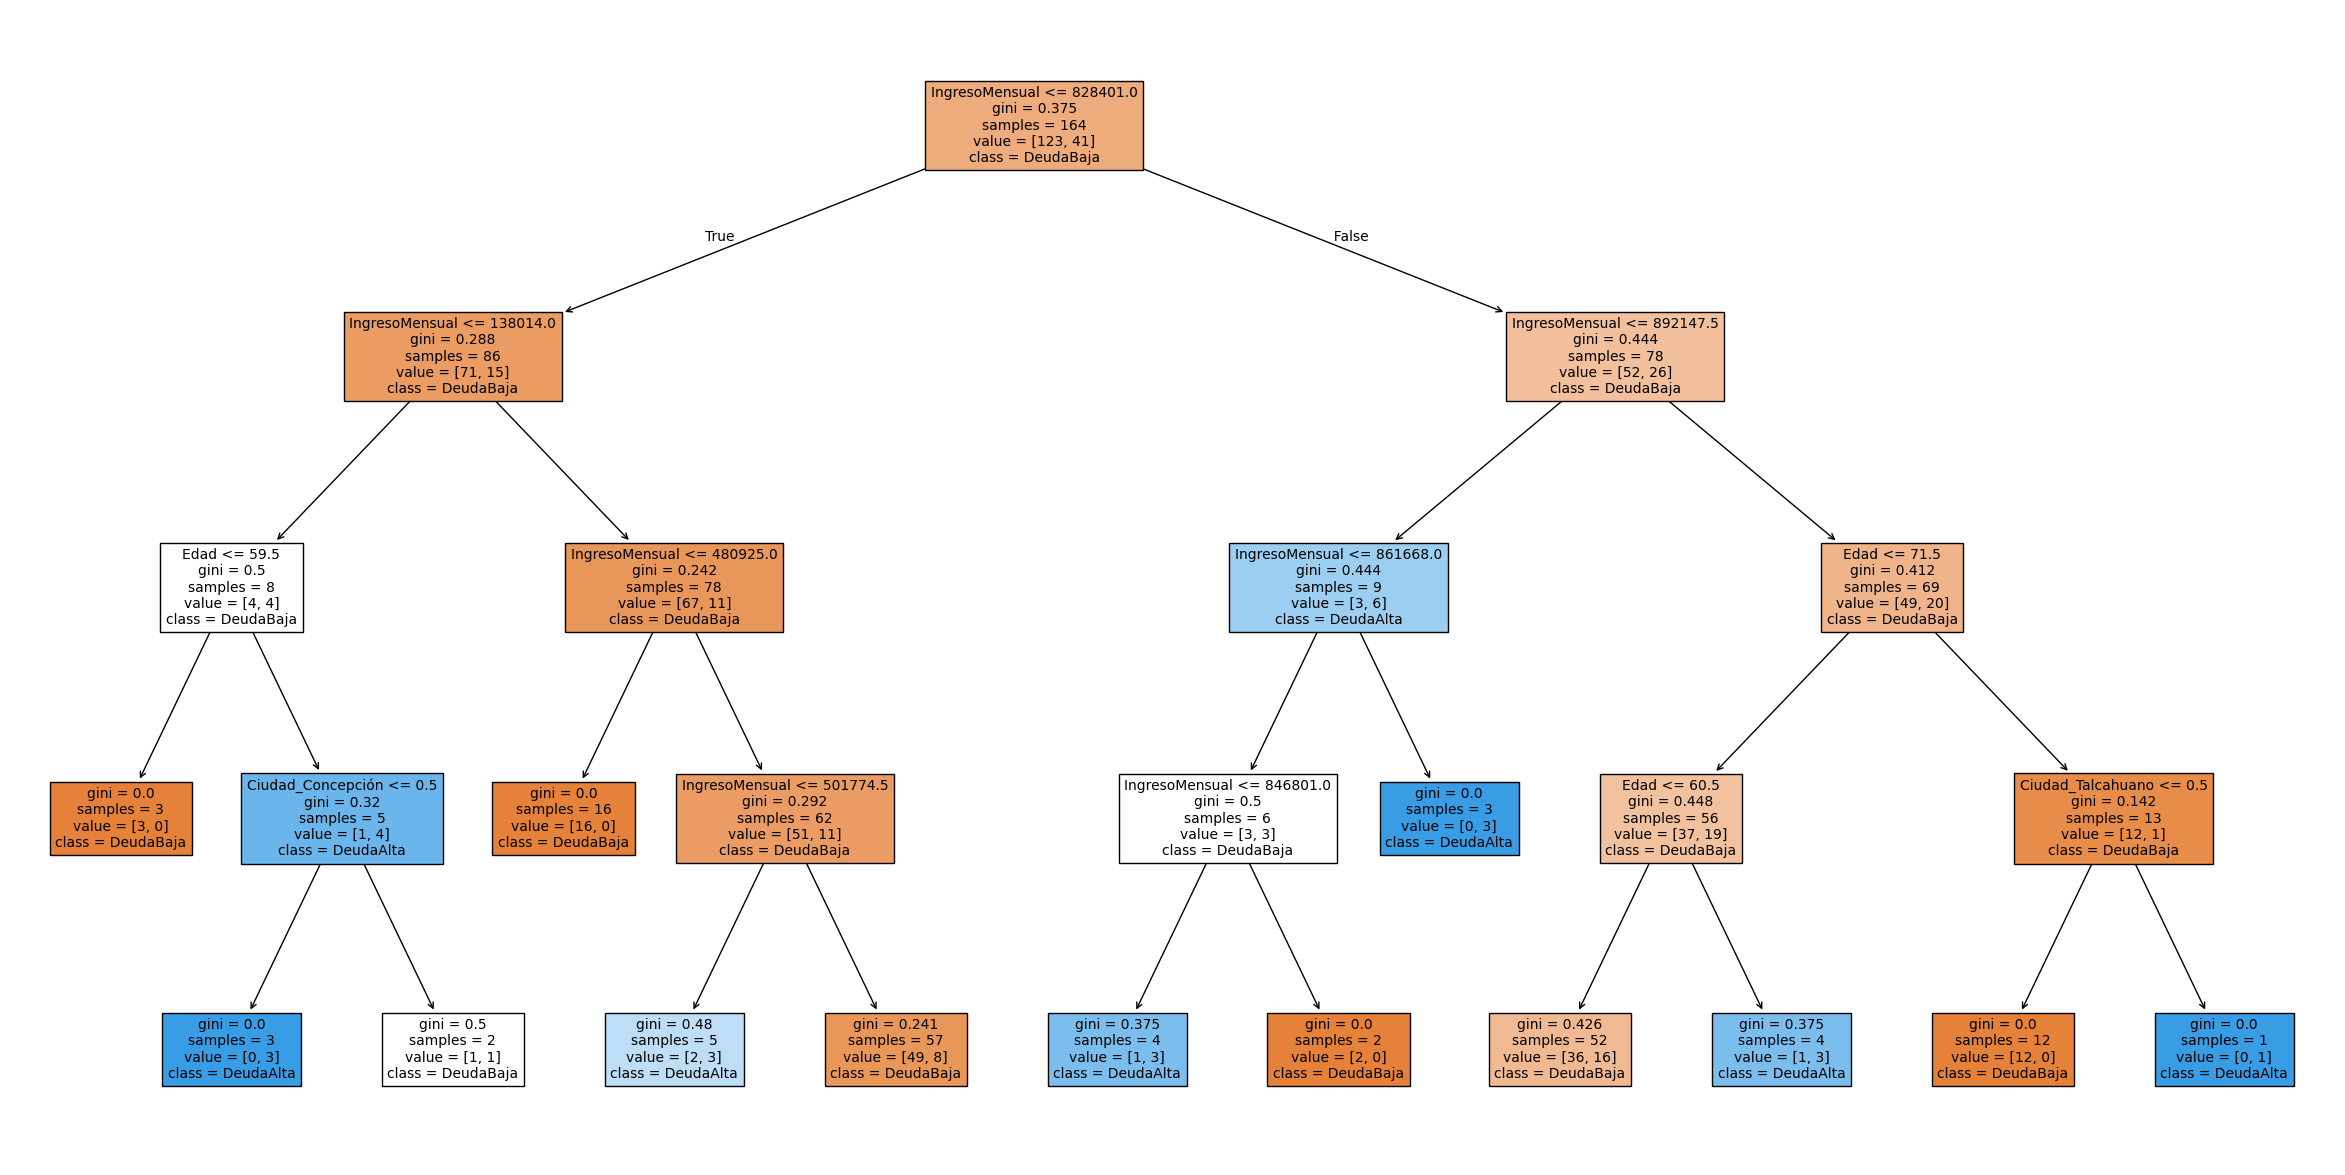

In [2]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import tree
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

dfNormal = pd.read_csv('clientes_integrador.csv', sep=';')

umbralDeuda = dfNormal['Deuda'].quantile(0.75)
dfNormal['claseDeuda'] = np.where(dfNormal['Deuda'] > umbralDeuda, 1, 0)

# Impute missing values in 'IngresoMensual' and 'Genero' before one-hot encoding
dfNormal['IngresoMensual'].fillna(dfNormal['IngresoMensual'].mean(), inplace=True)
dfNormal['Genero'].fillna(dfNormal['Genero'].mode()[0], inplace=True)

# Separate features and target
xNormal = dfNormal.drop(columns=['Id', 'Deuda', 'claseDeuda'])
# Ensure yNormal is the binary 'claseDeuda' column
yNormal = dfNormal['claseDeuda']

# Apply OneHotEncoder to categorical columns in xNormal
categorical_cols = ['Ciudad', 'Genero']
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_features = ohe.fit_transform(xNormal[categorical_cols])
encoded_feature_names = ohe.get_feature_names_out(categorical_cols)
df_encoded_features = pd.DataFrame(encoded_features, columns=encoded_feature_names, index=xNormal.index)

# Combine numerical and encoded categorical features
xNormal_processed = pd.concat([xNormal.drop(columns=categorical_cols), df_encoded_features], axis=1)


# Split the data
Xtr, Xte, ytr, yte = train_test_split(
    xNormal_processed, yNormal, test_size=0.20,
    random_state=42, stratify=yNormal # Use yNormal (which is now claseDeuda) for stratification
)

dtc = DecisionTreeClassifier(random_state=42, max_depth=4)
dtc = dtc.fit(Xtr, ytr)

# Now plot the tree using the correct feature names from the training data (Xtr)
plt.figure(figsize=(30,15)) # Adjusted figure size
tree.plot_tree(dtc, feature_names=Xtr.columns.tolist(),class_names=['DeudaBaja', 'DeudaAlta'] , filled=True, fontsize=10)
plt.show()